FIBSEM Microscope Testing Notebook

- Testing Basic Functionality
    - Connection to Microscope
    - Image Acquisition
    - Image Data and Metadata 
    

Importing Modules and Utilities built for FIBSEM

In [8]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, acquire
import numpy as np
import fibsem.alignment as fa
from fibsem.structures import BeamType, ImageSettings, FibsemRectangle, FibsemImage
import matplotlib.pyplot as plt
import matplotlib
from fibsem.imaging import masks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


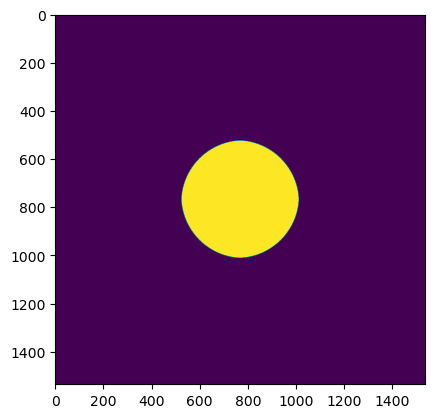

In [6]:
circle = masks.create_circle_mask(shape=(1536, 1536), radius=256, sigma=3)
plt.imshow(circle)
plt.show()

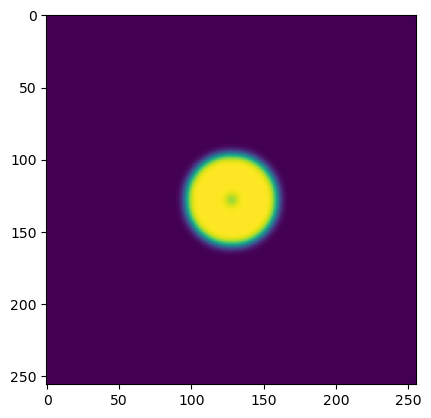

In [33]:
band = masks.create_bandpass_mask()
plt.imshow(band)
plt.show()

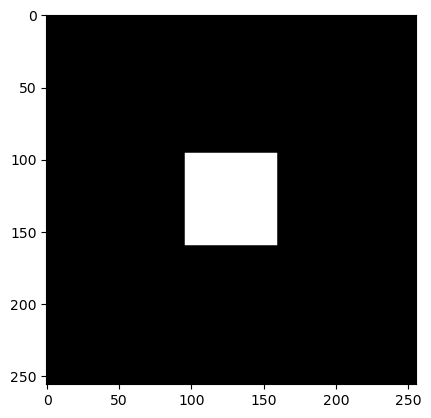

In [41]:
img = np.zeros([256,256,3],dtype=np.uint8)
img.fill(255) # or img[:] = 255

band = masks.create_rect_mask(img, w=64, h=64)
band = band * 255
#plt.imshow(img)
plt.imshow(band)
plt.show()


2023-02-21 10:33:11,780 — root — INFO — setup_session:214 — Finished setup for session: autolamella_demo_2023-02-21-10-33-11AM


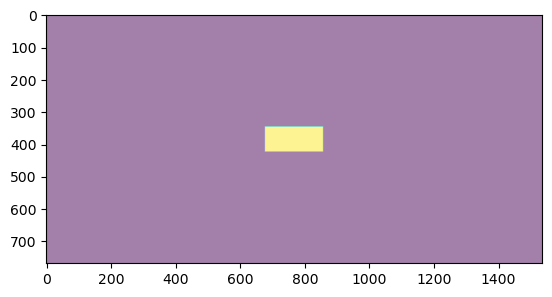

In [80]:

microscope, microscope_settings = utils.setup_session(protocol_path="C:\\Users\\lnae0002\\Desktop\\DeMarco\\GitHub\\fibsem\\example\\protocol_autolamella.yaml")
protocol = microscope_settings.protocol
image = acquire.new_image(microscope, microscope_settings.image)
band = masks.create_lamella_mask(image, protocol)
#plt.imshow(image.data)
plt.imshow(band, alpha=0.5)
plt.show()

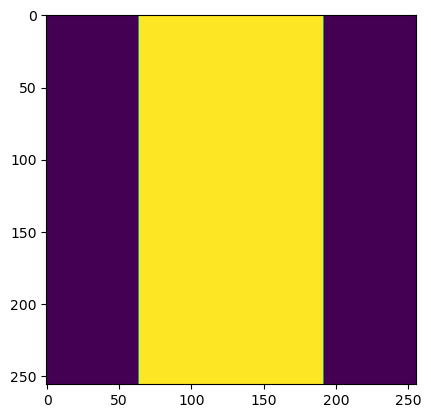

In [17]:
img = np.zeros([256,256],dtype=np.uint8)
img[100:156, 100:156] = 255
# mask = np.zeros([256,64])
band = masks.create_vertical_mask(img, width = 64)
# plt.show(img)
plt.imshow(band)
plt.show()

2023-02-23 13:28:53,731 — root — INFO — setup_session:214 — Finished setup for session: autolamella_demo_2023-02-23-01-28-53PM


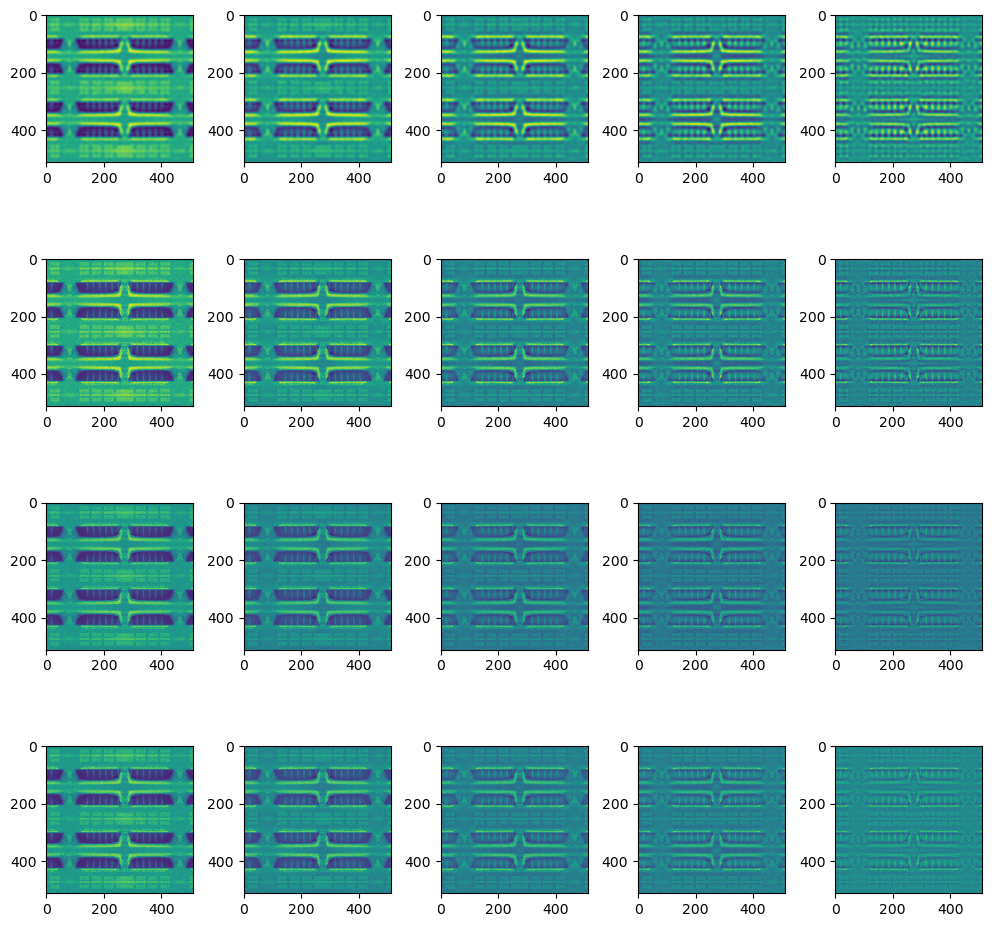

In [26]:
microscope, microscope_settings = utils.setup_session(protocol_path=r"C:\Users\lnae0002\Desktop\fibsem\example\protocol_autolamella.yaml")
protocol = microscope_settings.protocol
microscope_settings.image.resolution = [512,512]
microscope_settings.image.beam_type = BeamType.ION
image = acquire.new_image(microscope, microscope_settings.image)
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
lowpass = [32, 64, 128,256]
highpass = [3,6,9,12,18] 
n_pixels = image.data.shape[0] * image.data.shape[1]
for i, lp in enumerate(lowpass):
    for j, hp in enumerate(highpass):
        bandpass = masks.create_bandpass_mask(shape= (512,512), lp=lp, hp=hp, sigma=3)
        img1ft = np.fft.ifftshift(bandpass * np.fft.fftshift(np.fft.fft2(image.data)))
        tmp = img1ft * np.conj(img1ft)
        img1ft = n_pixels * img1ft / np.sqrt(tmp.sum())
        ax[i][j].imshow(np.fft.ifft2(img1ft).real)

fig.tight_layout(pad=1.0)
fig.set_title(f"Masked Image, low pass = {lp}, high pass = {hp}")
# ax[1].set_title("Inverse FFT")
#plt.imshow(image.data)
# plt.imshow(masked_img)
plt.show()

Setting up connection to Microscope

In [5]:
# connect to microscope
microscope, microscope_settings = utils.setup_session()

2023-02-23 10:45:16,175 — root — INFO — connect_to_microscope:293 — Microscope client connecting to [localhost:7520]
Client connecting to [localhost:7520]...
Client connected to [localhost:7520]
2023-02-23 10:45:16,183 — root — INFO — connect_to_microscope:295 — Microscope client connected to [localhost:7520]
2023-02-23 10:45:16,184 — root — INFO — setup_session:214 — Finished setup for session: demo_2023-02-23-10-30-47AM


Setting up basic image settings for Ion Beam and Electron Beam
- image settings reduced is for a reduced area with parameters set up with a rectangle

In [3]:
# set gamma settings
gamma_settings = GammaSettings(
        enabled=True,
        min_gamma=0.5,
        max_gamma=1.8,
        scale_factor=0.01,
        threshold=46,
    )

# set imaging settings
image_settings_eb = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=None,
    )


image_settings_ib = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ION,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=None,
    )
rectangle = FibsemRectangle(0.1, 0.3, 0.4, 0.4)
THERMO_ENABLED = True
image_settings_eb_reduced = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=rectangle.__to_FEI__() if THERMO_ENABLED else rectangle,
    )



Taking Images with Ion beam and Electron beam
- Checking Image settings
- Checking inherent metadata
    - Timestamp
    - Version (v1 at this stage)
- Checking data format
    - numpy array uint 8
- Plotting / Display image for check

2022-12-01 09:23:36,547 — root — INFO — acquire_image:212 — acquiring new ION image.
Image settings are the same
MicroscopeState(timestamp='12/01/2022 09:36:02', absolute_position=StagePosition(x=-0.015512833, y=0.05250325, z=0.023157054, t=1.1707575e-06, r=0.85526068, coordinate_system=Raw), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.012616823180611508, beam_current=5e-11, hfw=5e-05, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, hfw=0.00015, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None))
v1


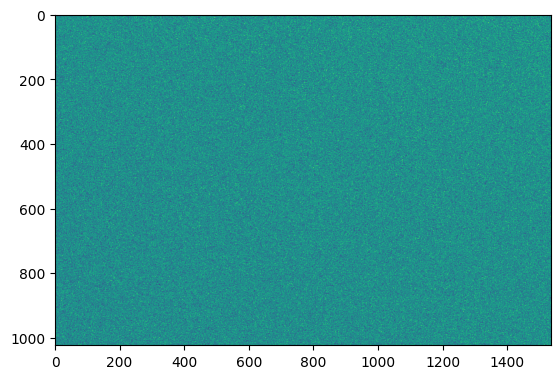

In [4]:
# take ion image
ib_image = acquire.new_image(microscope, image_settings_ib)

#checking image data
if ib_image.metadata.image_settings == image_settings_ib:
    print("Image settings are the same")
print(ib_image.metadata.microscope_state)
print(ib_image.metadata.version)


plt.imshow(ib_image.data)
plt.show()

In [7]:

gamma_settings.enabled = True
image_settings_eb = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1e-6,
        hfw=2700.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=True,
        save_path="tests",
        label="label2",
        reduced_area=None,
    )


# take electron image
eb_image = acquire.new_image(microscope, image_settings_eb, None)

#checking image data 
if eb_image.metadata.image_settings == image_settings_eb:
    print("Image settings are the same")
#print(eb_image.metadata.microscope_state.timestamp)
print(eb_image.metadata)

#plt.imshow(eb_image.data,cmap='magma')
#plt.show()

## Saving metadata to image file ouput##



2022-12-01 09:24:51,203 — root — INFO — acquire_image:212 — acquiring new ELECTRON image.
Image settings are the same
FibsemImageMetadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.0027, autocontrast=True, beam_type=<BeamType.ELECTRON: 1>, save=True, label='label2', gamma=GammaSettings(enabled=True, min_gamma=0.5, max_gamma=1.8, scale_factor=0.01, threshold=46), save_path='tests', reduced_area=None), pixel_size=Point(x=1.7578125000000002e-06, y=1.7578125e-06), microscope_state=MicroscopeState(timestamp='12/01/2022 09:37:17', absolute_position=StagePosition(x=-0.015512833, y=0.05250325, z=0.023157054, t=1.1707575e-06, r=0.85526068, coordinate_system=Raw), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.012616823180611508, beam_current=5e-11, hfw=0.0027, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, hf

FibsemImageMetadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.0009651457961693737, autocontrast=True, beam_type=<BeamType.ION: 2>, save=True, label='label2', gamma=GammaSettings(enabled=True, min_gamma=0.5, max_gamma=1.8, scale_factor=0.01, threshold=46), save_path='tests', reduced_area=None), pixel_size=Point(x=6.28350127714436e-07, y=6.28350127714436e-07), microscope_state=MicroscopeState(timestamp='12/01/2022 09:36:08', absolute_position=StagePosition(), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.012616823180611508, beam_current=5e-11, hfw=5e-05, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, hfw=0.0009651457961693737, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None)), version='v1')


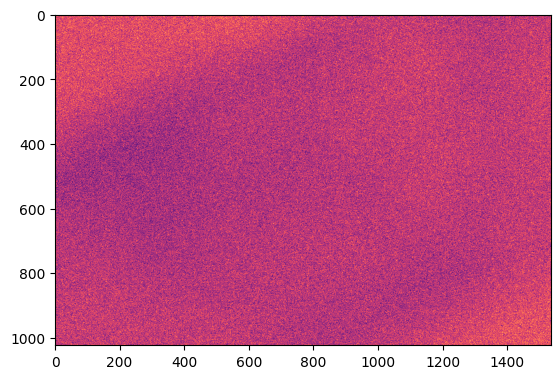

In [9]:
from fibsem import fibsemImage
img = fibsemImage.FibsemImage.load("tests\\label2_ib.tif")
plt.imshow(img.data,cmap='magma')
#plt.show()

print(img.metadata)
if img.metadata.microscope_state == eb_image.metadata.microscope_state:
    print("Metadata is the same")
#print(img.metadata)

2022-12-01 09:25:24,520 — root — INFO — acquire_image:212 — acquiring new ELECTRON image.
12/01/2022 09:37:49
v1


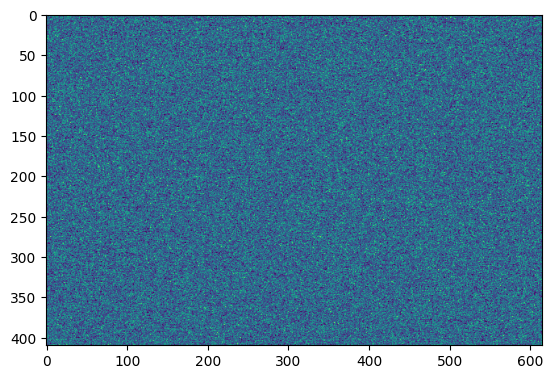

In [10]:
rectangle = FibsemRectangle(0.1, 0.1, 0.4, 0.4)
THERMO_ENABLED = True
image_settings_eb_reduced = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1.0e-6,
        hfw=300.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=rectangle.__to_FEI__() if THERMO_ENABLED else rectangle,
    )

# take electron image with reduced area
eb_image = acquire.new_image(microscope, image_settings_eb_reduced, image_settings_eb_reduced.reduced_area)

#checking image data 
if eb_image.metadata.image_settings == image_settings_eb:
    print("Image settings are the same")
print(eb_image.metadata.microscope_state.timestamp)
print(eb_image.metadata.version)

plt.imshow(eb_image.data)
plt.show()

Last image function test

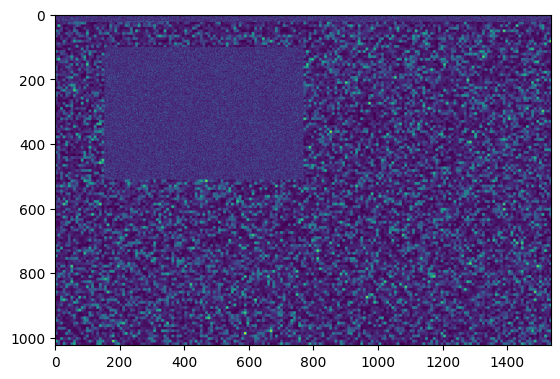

FibsemImageMetadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.0003, autocontrast=True, beam_type=<BeamType.ELECTRON: 1>, save=False, label='2022-12-01.09-27-13AM', gamma=GammaSettings(enabled=False, min_gamma=0.0, max_gamma=2.0, scale_factor=0.1, threshold=45), save_path='path', reduced_area=None), pixel_size=Point(x=1.9531249999999998e-07, y=1.9531249999999998e-07), microscope_state=MicroscopeState(timestamp='12/01/2022 09:37:49', absolute_position=StagePosition(x=-0.015512833, y=0.05250325, z=0.023157054, t=1.1707575e-06, r=0.85526068, coordinate_system=Raw), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.012616823180611508, beam_current=5e-11, hfw=0.0003, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, hfw=0.0009651457961693737, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None

In [12]:
#testing last image function
img = acquire.last_image(microscope)
plt.imshow(img.data)
plt.show()
print(img.metadata)

Taking set of reference images, now FibsemImages

2022-12-01 09:35:47,840 — root — INFO — acquire_image:215 — acquiring new ELECTRON image.
2022-12-01 09:36:03,378 — root — INFO — acquire_image:215 — acquiring new ION image.
2022-12-01 09:37:02,594 — root — INFO — acquire_image:215 — acquiring new ELECTRON image.
2022-12-01 09:37:05,383 — root — INFO — acquire_image:215 — acquiring new ION image.


AssertionError: hfw: 0.00015 != 0.0004

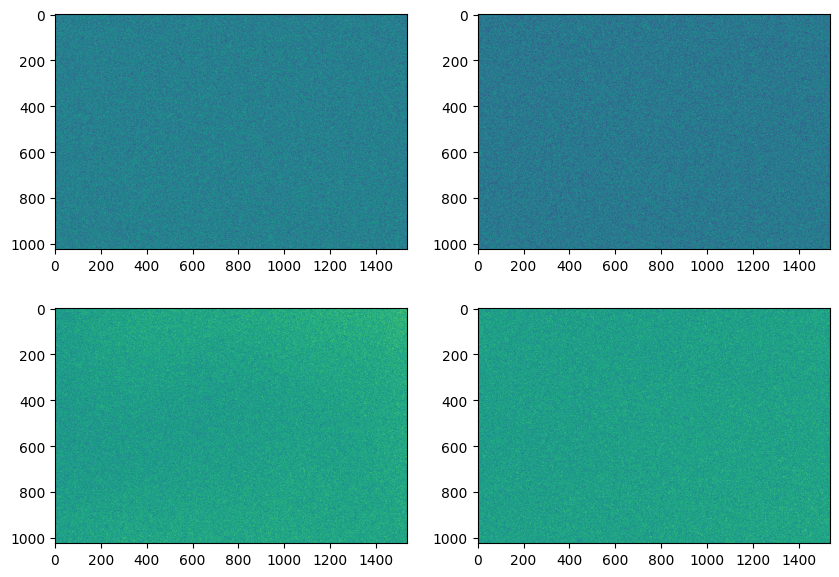

In [20]:
#taking set of ref images
hfws =  [400e-6, 150.0e-6]
ref_images = acquire.take_set_of_reference_images(microscope, image_settings_eb,hfws)
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2, 2, 1)
plt.imshow(ref_images.low_res_eb.data)
fig.add_subplot(2, 2, 2)
plt.imshow(ref_images.high_res_eb.data)
fig.add_subplot(2, 2, 3)
plt.imshow(ref_images.low_res_ib.data)
fig.add_subplot(2, 2, 4)
plt.imshow(ref_images.high_res_ib.data)

#checking image data 
# if ref_images..metadata.image_settings == image_settings_eb:
#     print("Image settings are the same")
# print(ref_images[0].metadata.microscope_state.timestamp)
# print(ref_images[0].metadata.version)


assert ref_images.low_res_eb.metadata.image_settings.hfw == hfws[0], f"hfw: {ref_images.low_res_eb.metadata.image_settings.hfw} != {hfws[0]}"
assert ref_images.low_res_ib.metadata.image_settings.hfw == hfws[0], f"hfw: {ref_images.low_res_ib.metadata.image_settings.hfw} != {hfws[0]}"
assert ref_images.high_res_eb.metadata.image_settings.hfw == hfws[1], f"hfw: {ref_images.high_res_eb.metadata.image_settings.hfw} != {hfws[1]}"
assert ref_images.high_res_ib.metadata.image_settings.hfw == hfws[1], f"hfw: {ref_images.high_res_ib.metadata.image_settings.hfw} != {hfws[1]}"


Testing beam alignment using reference image

In [ ]:
new_image = acquire.new_image(microscope, image_settings_eb, None)
fa.align_using_reference_images(microscope, microscope_settings, ref_images.high_res_eb, new_image )